In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("HomeC.csv",low_memory=False)
print(f'HomeC.csv : {df.shape}')
df.head()

HomeC.csv : (503911, 32)


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


# Data Cleaning

In [3]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [4]:
df.columns = [i.replace(' [kW]', '') for i in df.columns]

In [5]:
df['Furnace'] = df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)
df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)

In [6]:
df[df.isnull().any(axis=1)]

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use                  503910 non-null  float64
 2   gen                  503910 non-null  float64
 3   House overall        503910 non-null  float64
 4   Dishwasher           503910 non-null  float64
 5   Home office          503910 non-null  float64
 6   Fridge               503910 non-null  float64
 7   Wine cellar          503910 non-null  float64
 8   Garage door          503910 non-null  float64
 9   Barn                 503910 non-null  float64
 10  Well                 503910 non-null  float64
 11  Microwave            503910 non-null  float64
 12  Living room          503910 non-null  float64
 13  Solar                503910 non-null  float64
 14  temperature          503910 non-null  float64
 15  humidity         

In [8]:
df = df[0:-1]

In [9]:
df['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', '0.41', '0.78', '0.2', '0.77', '0.46', '0.55', '0.01',
       '0.51', '0.47', '0.5', '0.4', '0.3', '0.43', '0.33', '0.6', '0.68',
       '0.66', '0.45', '0.34', '0.52', '0.67', '0.49', '0.37', '0.36',
       '0.61', '0.38', '0.42', '0.53', '0.63', '0.32', '0.56', '0.58',
       '0.72', '0.73', '0.71', '0.64', '0.59'], dtype=object)

In [10]:
df[df['cloudCover']=='cloudCover'].shape

(58, 27)

In [11]:
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')

In [12]:
pd.to_datetime(df['time'], unit='s').head(3)

0   2016-01-01 05:00:00
1   2016-01-01 05:00:01
2   2016-01-01 05:00:02
Name: time, dtype: datetime64[ns]

In [13]:
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df.head(3)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617


In [14]:
df['year'] = df['time'].apply(lambda x : x.year)
df['month'] = df['time'].apply(lambda x : x.month)
df['day'] = df['time'].apply(lambda x : x.day)
df['weekday'] = df['time'].apply(lambda x : x.day_name())
df['weekofyear'] = df['time'].apply(lambda x : x.weekofyear)
df['hour'] = df['time'].apply(lambda x : x.hour)
df['minute'] = df['time'].apply(lambda x : x.minute)
df.head(3)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,precipProbability,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,0.0,0.082617,0.000567,2016,1,1,Friday,53,5,0
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,0.0,0.084533,0.000567,2016,1,1,Friday,53,5,1
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,0.0,0.083017,0.000617,2016,1,1,Friday,53,5,2


In [15]:
def hours2timing(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

In [16]:
df['timing'] = df['hour'].apply(hours2timing)
df.head(3)

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,Furnace,Kitchen,year,month,day,weekday,weekofyear,hour,minute,timing
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,0.082617,0.000567,2016,1,1,Friday,53,5,0,Morning
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,0.084533,0.000567,2016,1,1,Friday,53,5,1,Morning
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,0.083017,0.000617,2016,1,1,Friday,53,5,2,Morning


In [17]:
df['use_HO'] = df['use']
df['gen_Sol'] = df['gen']
df.drop(['use','House overall','gen','Solar'], axis=1, inplace=True)
df.head(3)

,time,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,year,month,day,weekday,weekofyear,hour,minute,timing,use_HO,gen_Sol
0,2016-01-01 05:00:00,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,2016,1,1,Friday,53,5,0,Morning,0.932833,0.003483
1,2016-01-01 05:01:00,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,2016,1,1,Friday,53,5,1,Morning,0.934333,0.003467
2,2016-01-01 05:02:00,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,2016,1,1,Friday,53,5,2,Morning,0.931817,0.003467


In [194]:
energy_data = df.filter(items=['use_HO', 'gen_Sol', 
                                     'Dishwasher', 'Furnace',
                                     'Home office', 'Fridge', 'Wine cellar', 
                                     'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room', 'time'])

weather_data = df.filter(items=['temperature','humidity', 'apparentTemperature', 'time'])

In [195]:
energy_data = energy_data.set_index('time')
weather_data = weather_data.set_index('time')

In [196]:
energy_data.head()

,use_HO,gen_Sol,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
time,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.082617,0.442633,0.124150,0.006983,0.013083,0.000567,0.031350,0.001017,0.004067,0.001517
2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.084533,0.444067,0.124000,0.006983,0.013117,0.000567,0.031500,0.001017,0.004067,0.001650
2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.083017,0.446067,0.123533,0.006983,0.013083,0.000617,0.031517,0.001000,0.004067,0.001650
2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.175417,0.446583,0.123133,0.006983,0.013000,0.000650,0.031500,0.001017,0.004067,0.001617
2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.300917,0.446533,0.122850,0.006850,0.012783,0.000783,0.031500,0.001017,0.004067,0.001583


In [197]:
weather_per_day = weather_data.resample('D').mean()
weather_per_day.head()

,temperature,humidity,apparentTemperature
time,,,
2016-01-01,35.725737,0.631825,29.815211
2016-01-02,31.692569,0.580056,24.462806
2016-01-03,33.273625,0.613597,26.769736
2016-01-04,22.297722,0.598597,11.067278
2016-01-05,11.950139,0.535292,2.759708


In [198]:
energy_per_day = energy_data.resample('D').sum() 
energy_per_day.head()

,use_HO,gen_Sol,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
time,,,,,,,,,,,,,
2016-01-01,1366.269517,18.026200,59.517171,492.020017,64.668783,94.740300,29.093367,15.228367,11.619833,99.622950,30.537233,12.961117,77.071667
2016-01-02,1851.521067,76.051300,63.154404,683.761967,145.570317,74.851733,24.096767,19.246333,15.464256,185.776967,33.688133,12.480300,71.142950
2016-01-03,1651.128133,74.081433,105.508668,613.630533,196.064167,92.149033,32.989533,19.444933,19.092004,146.493667,31.955233,19.066117,42.779250
2016-01-04,1500.686017,108.525017,58.880760,605.129767,180.650867,71.016683,20.980700,19.249983,17.346254,47.837017,43.438883,20.249933,93.077467
2016-01-05,1597.968867,148.107500,72.973254,817.065250,133.360867,80.135633,30.792300,19.773067,14.754489,50.166067,19.157417,16.658967,44.483650


# Data Visualization

Energy Consumption & Generation 

<AxesSubplot:xlabel='time'>

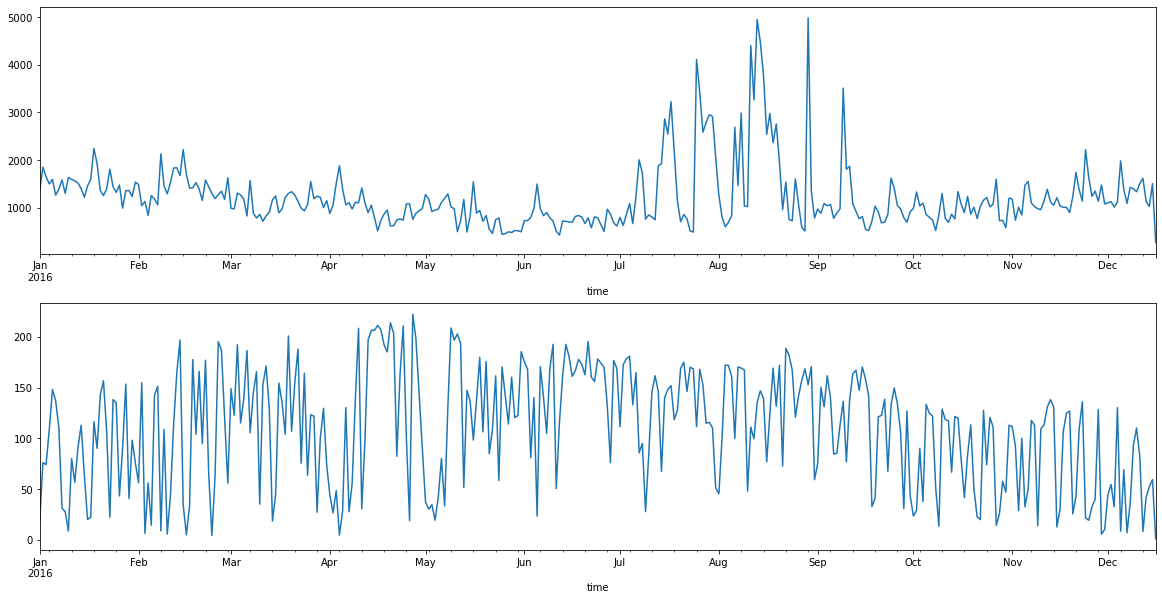

In [199]:
fig, axes = plt.subplots(nrows=2, ncols=1)
energy_per_day['use_HO'].plot(ax=axes[0],figsize=(20,10))
energy_per_day['gen_Sol'].plot(ax=axes[1],figsize=(20,10))

Highest Energy Consuming Rooms & Appliances

<AxesSubplot:title={'center':'Each Room & Appliance energy consumption per day'}, xlabel='time'>

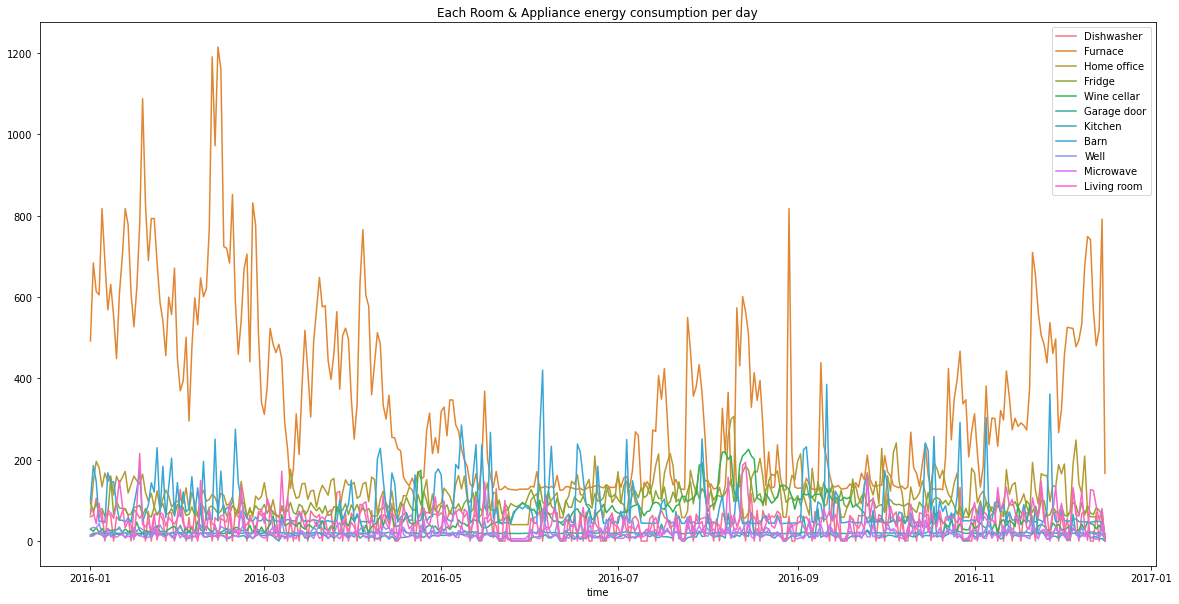

In [200]:
plt.figure(figsize=(20,10))
plt.title("Each Room & Appliance energy consumption per day")
sns.lineplot(data = energy_per_day.filter(items=['Dishwasher', 'Furnace', 
                                     'Home office', 'Fridge', 'Wine cellar', 
                                     'Garage door', 'Kitchen',
                                     'Barn', 'Well',
                                     'Microwave', 'Living room']), dashes=False)

In [201]:
energy_per_month = energy_data.resample('M').sum()

Highest Energy Consuming Rooms & Appliances (Monthly)

<AxesSubplot:title={'center':'Each Room & Appliance energy consumption per month'}, xlabel='time'>

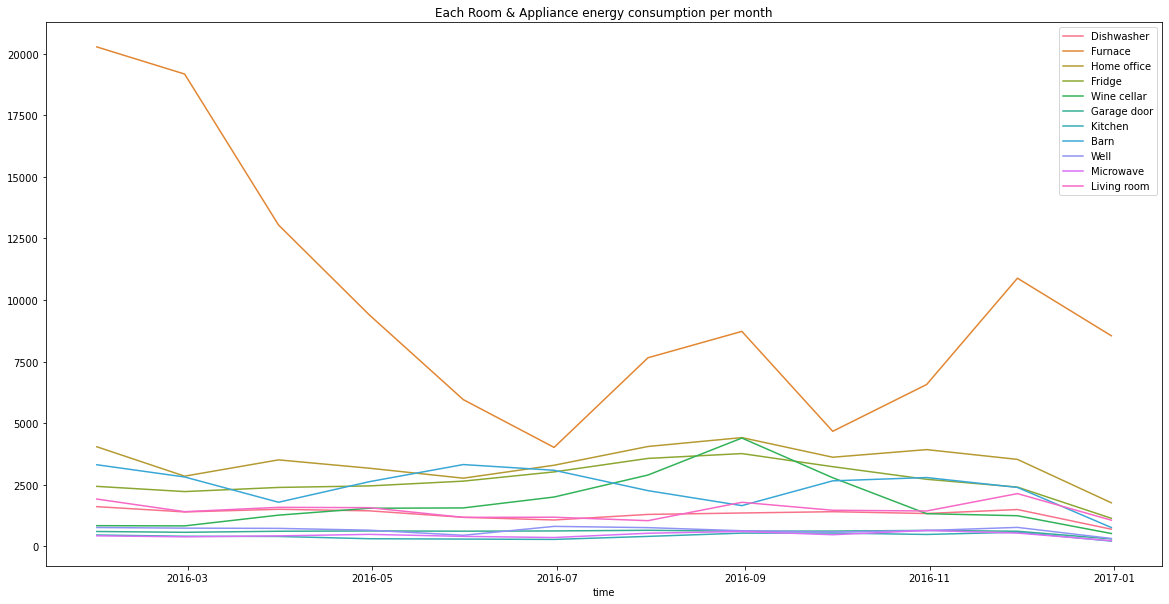

In [202]:
plt.figure(figsize=(20,10))
plt.title("Each Room & Appliance energy consumption per month")
sns.lineplot(data = energy_per_month.filter(items=['Dishwasher', 'Furnace', 
                                     'Home office', 'Fridge', 'Wine cellar', 
                                     'Garage door', 'Kitchen',
                                     'Barn', 'Well',
                                     'Microwave', 'Living room']), dashes=False)

Highest Energy Consuming Devices (Monthly)

<AxesSubplot:title={'center':'Appliances energy consumption per month'}, xlabel='time'>

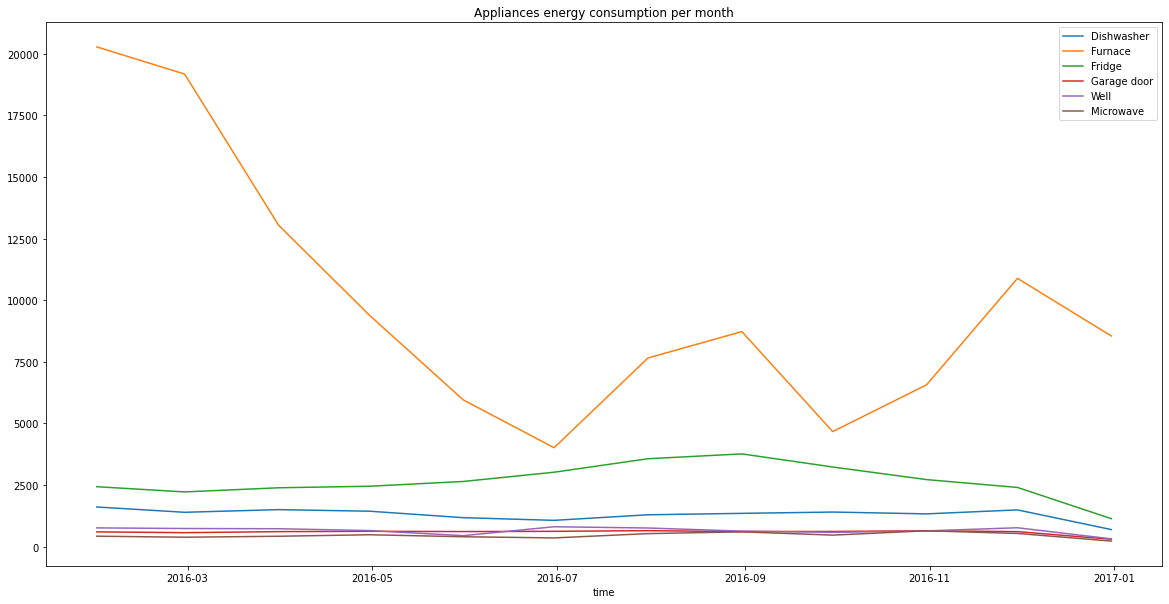

In [203]:
plt.figure(figsize=(20,10))
plt.title("Appliances energy consumption per month")
sns.lineplot(data = energy_per_month.filter(items=['Dishwasher', 'Furnace', 
                                     'Fridge', 
                                     'Garage door',
                                     'Well',
                                     'Microwave']), dashes=False)

Highest Energy Consuming Rooms (Monthly)

<AxesSubplot:title={'center':'Rooms energy consumption per month'}, xlabel='time'>

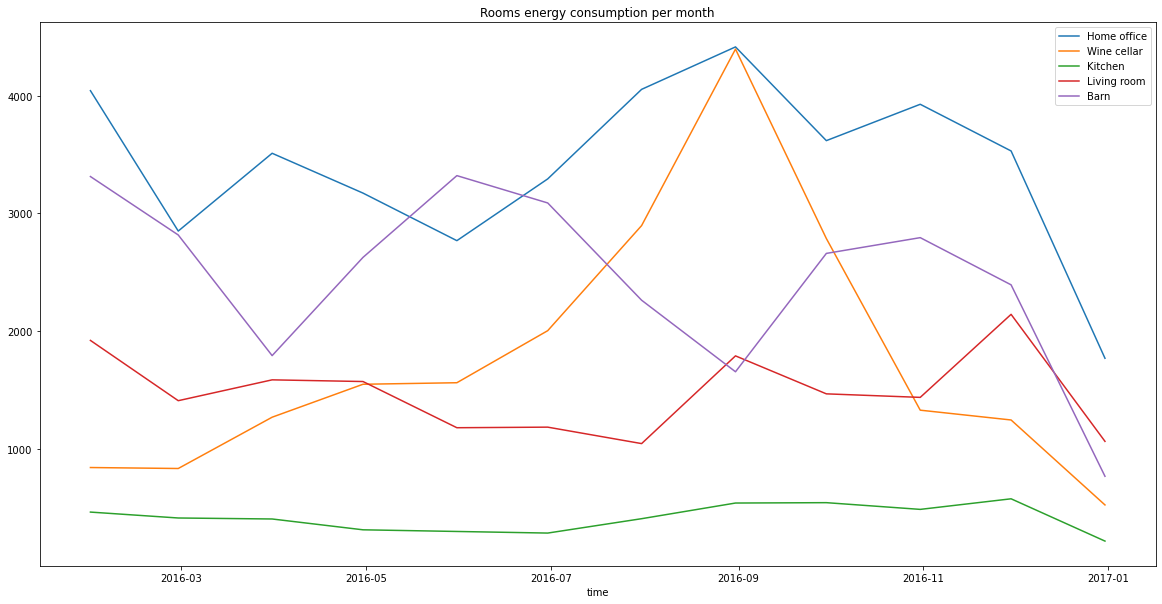

In [204]:
plt.figure(figsize=(20,10))
plt.title("Rooms energy consumption per month")
sns.lineplot(data = energy_per_month.filter(items=['Home office', 'Wine cellar', 
                                     'Kitchen', 
                                     'Living room',
                                     'Barn']), dashes=False)

<AxesSubplot:xlabel='time'>

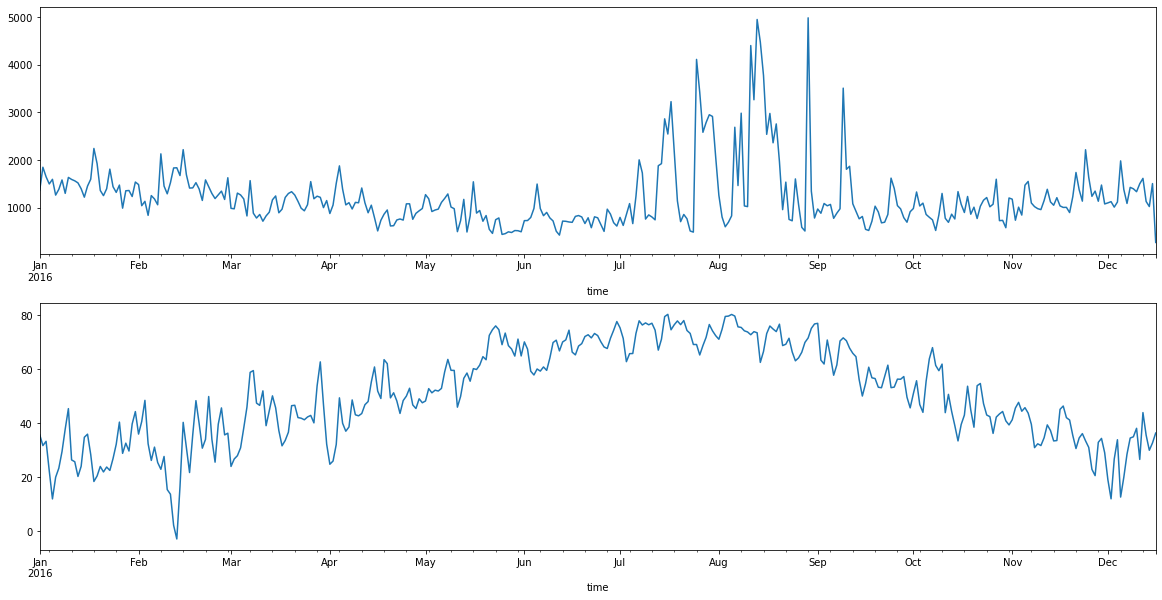

In [205]:
fig, axes = plt.subplots(nrows=2, ncols=1)
energy_per_day['use_HO'].plot(ax=axes[0],figsize=(20,10))
weather_per_day['temperature'].plot(ax=axes[1],figsize=(20,10))

<AxesSubplot:xlabel='time'>

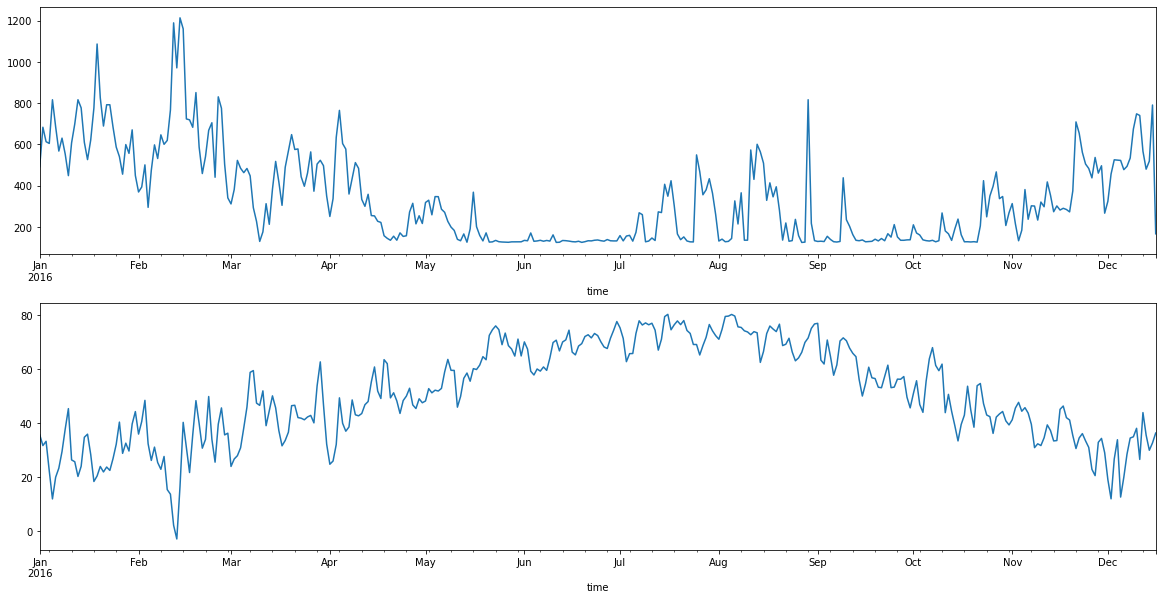

In [206]:
fig, axes = plt.subplots(nrows=2, ncols=1)
energy_per_day['Furnace'].plot(ax=axes[0],figsize=(20,10))
weather_per_day['temperature'].plot(ax=axes[1],figsize=(20,10))

<AxesSubplot:title={'center':'Furnace Energy Consumption'}, xlabel='time'>

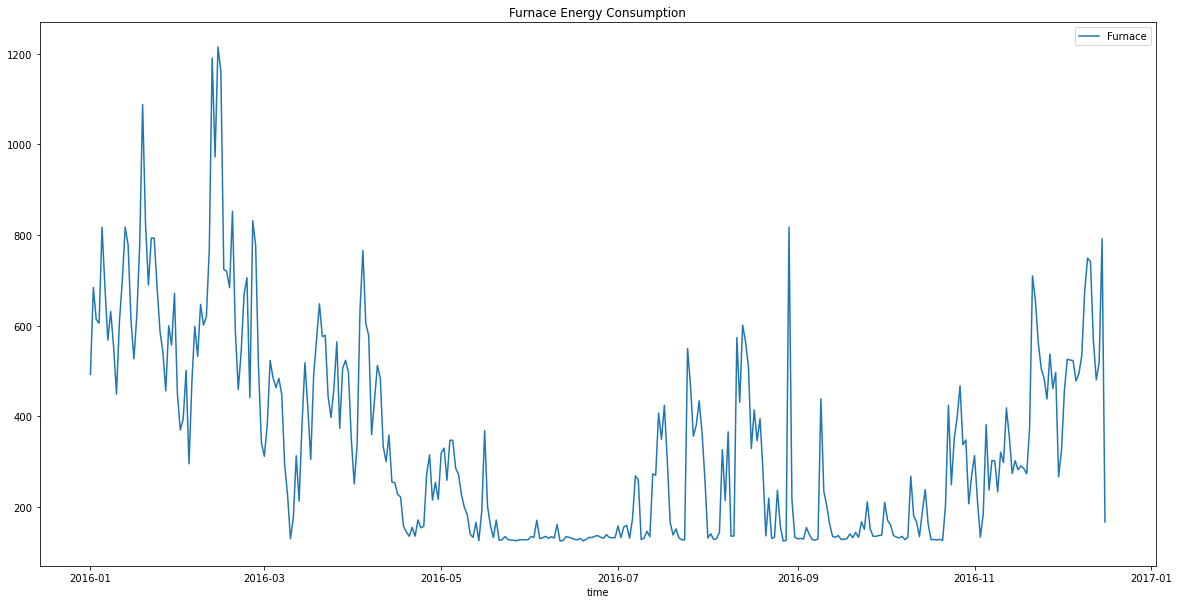

In [207]:
plt.figure(figsize=(20,10))
plt.title("Furnace Energy Consumption")
sns.lineplot(data = energy_per_day.filter(items=['Furnace']), dashes=False)

<AxesSubplot:title={'center':'Home office Energy Consumption'}, xlabel='time'>

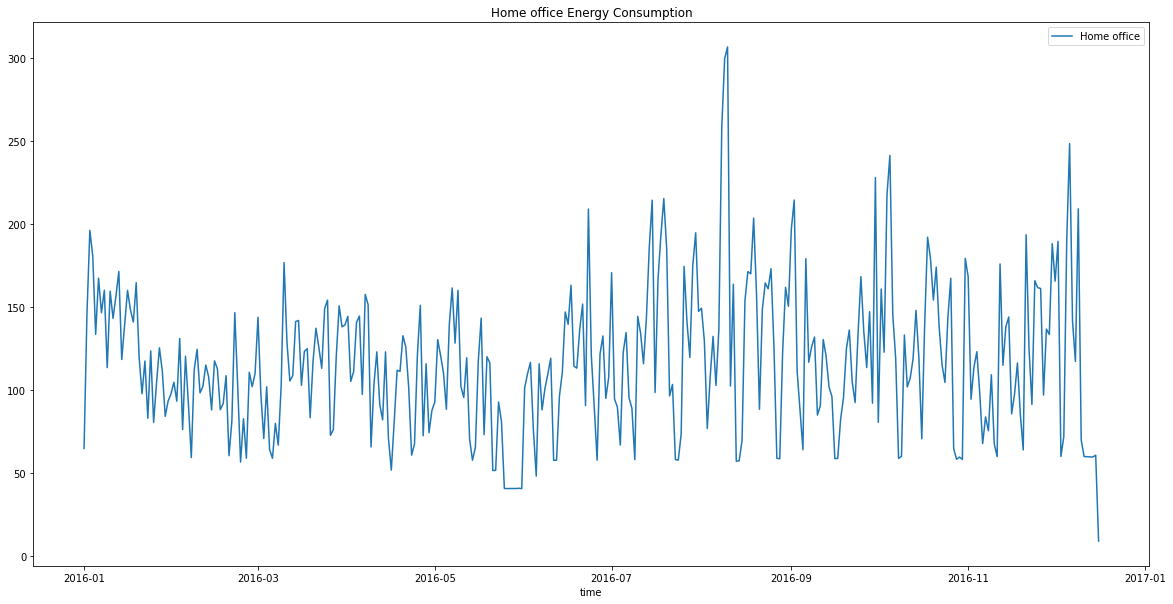

In [208]:
plt.figure(figsize=(20,10))
plt.title("Home office Energy Consumption")
sns.lineplot(data = energy_per_day.filter(items=['Home office']), dashes=False)

In [209]:
rooms_energy = energy_per_month.filter(items=['Home office', 'Wine cellar', 'Kitchen', 'Barn',
                                     'Living room']) 
devices_energy = energy_per_month.filter(items=['Dishwasher',
                                     'Furnace','Fridge',
                                     'Garage door', 'Well',
                                     'Microwave'])

all_rooms_consum = rooms_energy.sum()
all_devices_consum = devices_energy.sum()

Text(0, 0.5, '%')

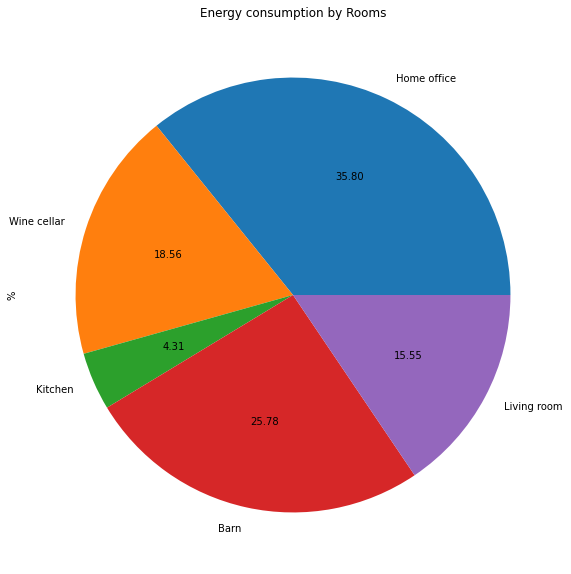

In [210]:
plot = all_rooms_consum.plot(kind="pie", autopct='%.2f', figsize=(10,10))
plot.set_title("Energy consumption by Rooms")
plot.set_ylabel('%')

Text(0, 0.5, '%')

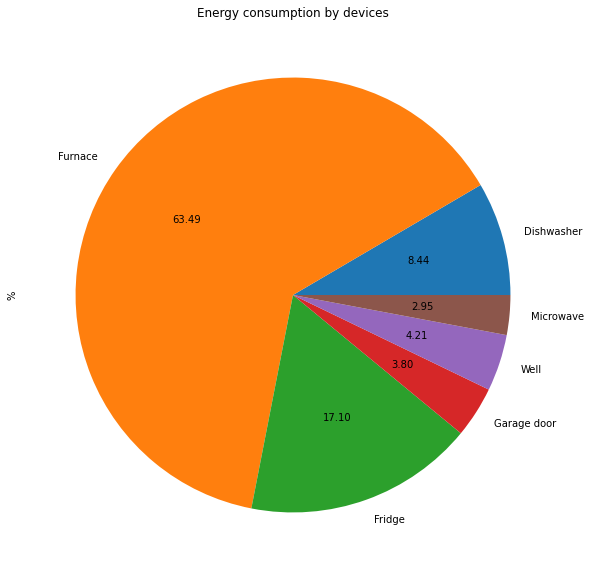

In [211]:
plot = all_devices_consum.plot(kind="pie", autopct='%.2f', figsize=(10,10))
plot.set_title("Energy consumption by devices")
plot.set_ylabel('%')

In [212]:
df_for_weekTiming = df.set_index('time')
energy_data['day_of_week'] = df_for_weekTiming['weekday']
energy_data['timing'] = df_for_weekTiming['timing']
energy_data.head()

,use_HO,gen_Sol,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room,day_of_week,timing
time,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.082617,0.442633,0.124150,0.006983,0.013083,0.000567,0.031350,0.001017,0.004067,0.001517,Friday,Morning
2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.084533,0.444067,0.124000,0.006983,0.013117,0.000567,0.031500,0.001017,0.004067,0.001650,Friday,Morning
2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.083017,0.446067,0.123533,0.006983,0.013083,0.000617,0.031517,0.001000,0.004067,0.001650,Friday,Morning
2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.175417,0.446583,0.123133,0.006983,0.013000,0.000650,0.031500,0.001017,0.004067,0.001617,Friday,Morning
2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.300917,0.446533,0.122850,0.006850,0.012783,0.000783,0.031500,0.001017,0.004067,0.001583,Friday,Morning


<AxesSubplot:title={'center':'Day wise Energy Consumption'}, xlabel='Day of week', ylabel='Energy Consumption in KW'>

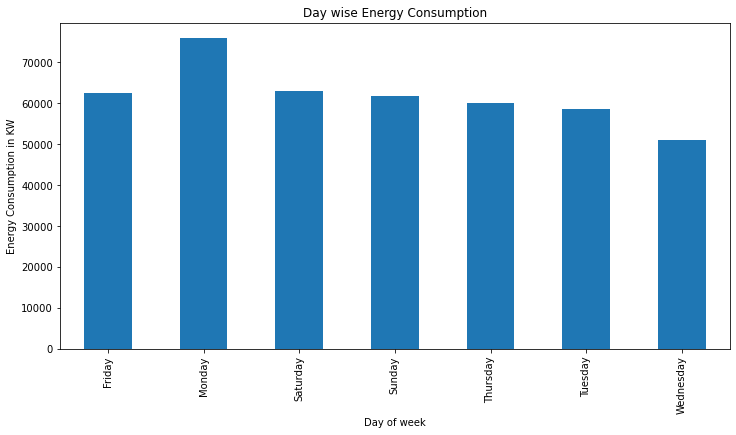

In [213]:
energy_weekday = energy_data.groupby(['day_of_week'])['use_HO'].sum()

energy_weekday.plot(kind='bar', title='Day wise Energy Consumption', ylabel='Energy Consumption in KW',
         xlabel='Day of week', figsize=(12, 6))

<AxesSubplot:title={'center':'Time of Day wise Energy Consumption'}, xlabel='Time of Day', ylabel='Energy Consumption in KW'>

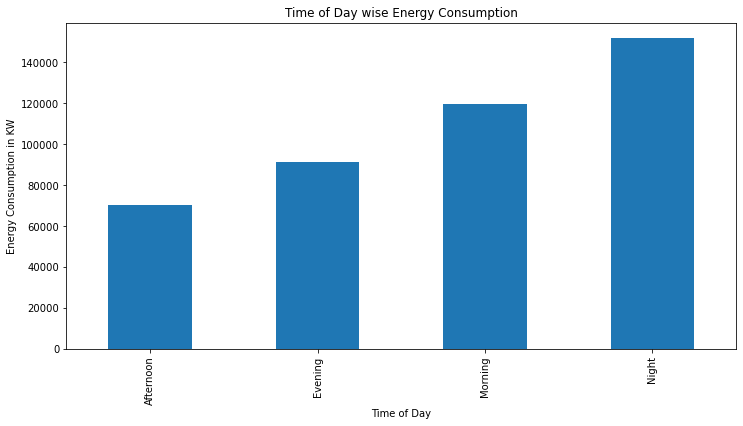

In [214]:
energy_timeOfDay = energy_data.groupby(['timing'])['use_HO'].sum()

energy_timeOfDay.plot(kind='bar', title='Time of Day wise Energy Consumption', ylabel='Energy Consumption in KW',
         xlabel='Time of Day', figsize=(12, 6))

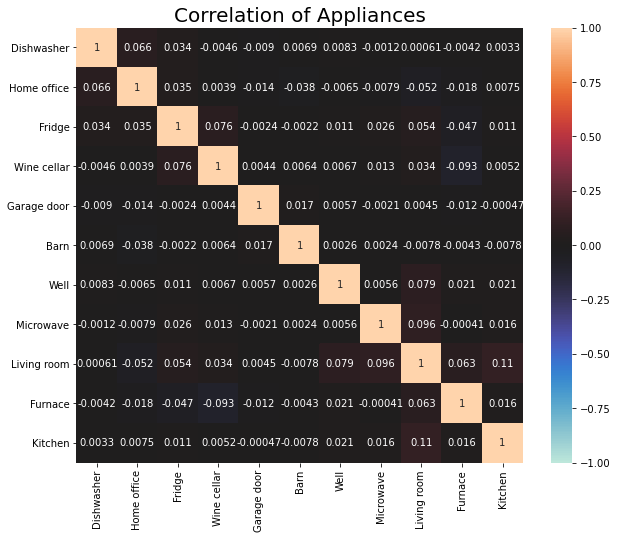

In [215]:
fig,ax = plt.subplots(figsize=(10, 8)) 
corr = df[['Dishwasher','Home office','Fridge','Wine cellar','Garage door','Barn','Well','Microwave','Living room','Furnace','Kitchen']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Appliances',size=20)
plt.show()

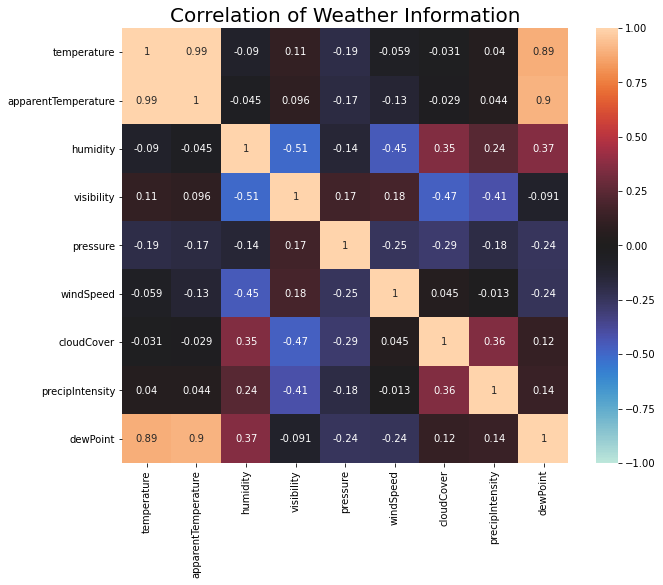

In [216]:
fig,ax = plt.subplots(figsize=(10, 8)) 
corr = df[['temperature','apparentTemperature','humidity','visibility','pressure','windSpeed','cloudCover','precipIntensity','dewPoint']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Weather Information',size=20)
plt.show()

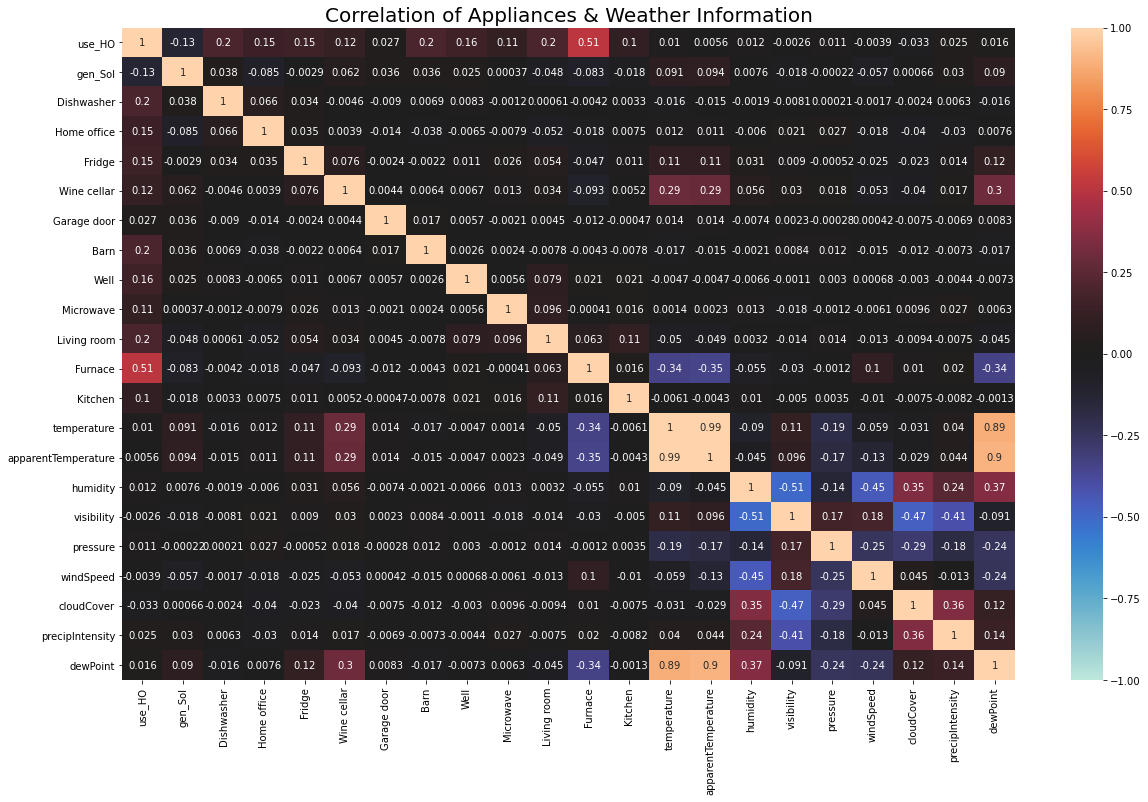

In [217]:
fig,ax = plt.subplots(figsize=(20, 12)) 
corr = df[['use_HO','gen_Sol','Dishwasher','Home office','Fridge','Wine cellar','Garage door','Barn','Well','Microwave','Living room','Furnace','Kitchen',\
           'temperature','apparentTemperature','humidity','visibility','pressure','windSpeed','cloudCover','precipIntensity','dewPoint']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Appliances & Weather Information',size=20)
plt.show()

# Feature Transformation

In [18]:
df = df.drop('year', axis=1)
df = df.drop('weekday', axis=1)
df = df.drop('timing', axis=1)

In [19]:
df1 = df.copy()

In [20]:
df1 = df1.set_index('time')
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Dishwasher           503910 non-null  float64
 1   Home office          503910 non-null  float64
 2   Fridge               503910 non-null  float64
 3   Wine cellar          503910 non-null  float64
 4   Garage door          503910 non-null  float64
 5   Barn                 503910 non-null  float64
 6   Well                 503910 non-null  float64
 7   Microwave            503910 non-null  float64
 8   Living room          503910 non-null  float64
 9   temperature          503910 non-null  float64
 10  humidity             503910 non-null  float64
 11  visibility           503910 non-null  float64
 12  apparentTemperature  503910 non-null  float64
 13  pressure             503910 non-null  float64
 14  windSpeed            503910 non-nu

In [21]:
df1.head()

,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,temperature,...,precipProbability,Furnace,Kitchen,month,day,weekofyear,hour,minute,use_HO,gen_Sol
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,36.14,...,0.0,0.082617,0.000567,1,1,53,5,0,0.932833,0.003483
2016-01-01 05:01:00,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,36.14,...,0.0,0.084533,0.000567,1,1,53,5,1,0.934333,0.003467
2016-01-01 05:02:00,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,36.14,...,0.0,0.083017,0.000617,1,1,53,5,2,0.931817,0.003467
2016-01-01 05:03:00,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,36.14,...,0.0,0.175417,0.000650,1,1,53,5,3,1.022050,0.003483
2016-01-01 05:04:00,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,36.14,...,0.0,0.300917,0.000783,1,1,53,5,4,1.139400,0.003467


Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop(['use_HO'], axis=1))

StandardScaler()

In [23]:
scaled = scaler.transform(df1.drop(['use_HO'], axis=1))

In [24]:
scaled.shape

(503910, 28)

Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components = 0.95)
pca.fit(scaled)
reduced = pca.transform(scaled)

In [27]:
pca_df = pd.DataFrame(reduced)

In [28]:
pca_df = pca_df.set_index(df1.index)
pca_df['use_HO'] = df1['use_HO']
pca_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,use_HO
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,1.126840,0.395868,-0.894022,-2.574182,0.138163,-0.321295,1.822729,1.182826,0.906742,-0.974619,...,0.721588,-0.940788,1.191581,1.304198,-1.610919,-1.160812,0.441118,0.185075,0.630763,0.932833
2016-01-01 05:01:00,1.128514,0.396421,-0.894982,-2.577780,0.136743,-0.316248,1.827073,1.150626,0.903676,-0.928794,...,0.713388,-0.934004,1.202677,1.307586,-1.615584,-1.161776,0.433618,0.184389,0.631726,0.934333
2016-01-01 05:02:00,1.127679,0.395217,-0.896674,-2.583570,0.133451,-0.314612,1.833515,1.117940,0.899005,-0.882506,...,0.708636,-0.924117,1.214841,1.315540,-1.620640,-1.166112,0.435606,0.180996,0.633300,0.931817
2016-01-01 05:03:00,1.203160,0.443293,-0.886510,-2.586482,0.142517,-0.261023,1.806887,1.087574,0.855819,-0.860793,...,0.649893,-0.928486,1.311883,1.217937,-1.642268,-1.117792,0.170577,0.230862,0.630050,1.022050
2016-01-01 05:04:00,1.305955,0.509086,-0.872336,-2.589425,0.155314,-0.188062,1.768963,1.055879,0.795616,-0.849990,...,0.572185,-0.937915,1.437149,1.085194,-1.669403,-1.051459,-0.189682,0.299272,0.625453,1.139400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-16 03:25:00,-0.453510,2.647516,-1.743572,-1.510292,1.137721,-0.622878,-0.714872,0.078284,-0.364108,-0.458105,...,-0.328318,0.711352,0.130164,-0.536746,0.557902,0.385710,-1.461992,0.017844,-1.356661,1.601233
2016-12-16 03:26:00,-0.451667,2.648770,-1.743521,-1.510653,1.137982,-0.619613,-0.715736,0.043203,-0.369971,-0.414705,...,-0.335903,0.715747,0.130509,-0.533411,0.557340,0.389537,-1.469380,0.018256,-1.356315,1.599333
2016-12-16 03:27:00,-0.182184,2.821033,-1.705971,-1.518581,1.170785,-0.431325,-0.812229,0.014669,-0.520028,-0.459491,...,-0.529776,0.678679,0.463600,-0.889331,0.485096,0.556095,-2.414198,0.199724,-1.369335,1.924267


In [29]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       503910 non-null  float64
 1   1       503910 non-null  float64
 2   2       503910 non-null  float64
 3   3       503910 non-null  float64
 4   4       503910 non-null  float64
 5   5       503910 non-null  float64
 6   6       503910 non-null  float64
 7   7       503910 non-null  float64
 8   8       503910 non-null  float64
 9   9       503910 non-null  float64
 10  10      503910 non-null  float64
 11  11      503910 non-null  float64
 12  12      503910 non-null  float64
 13  13      503910 non-null  float64
 14  14      503910 non-null  float64
 15  15      503910 non-null  float64
 16  16      503910 non-null  float64
 17  17      503910 non-null  float64
 18  18      503910 non-null  float64
 19  19      503910 non-null  float64
 20  20      503910

Train - Test Split

In [125]:
X_train = pca_df.iloc[0:501031,0:22]
y_train = pca_df.iloc[0:501031:,-1]
X_test = pca_df.iloc[501031:,0:22]
y_test = pca_df.iloc[501031:,-1]

In [32]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,1.126840,0.395868,-0.894022,-2.574182,0.138163,-0.321295,1.822729,1.182826,0.906742,-0.974619,...,-0.545227,0.721588,-0.940788,1.191581,1.304198,-1.610919,-1.160812,0.441118,0.185075,0.630763
2016-01-01 05:01:00,1.128514,0.396421,-0.894982,-2.577780,0.136743,-0.316248,1.827073,1.150626,0.903676,-0.928794,...,-0.543367,0.713388,-0.934004,1.202677,1.307586,-1.615584,-1.161776,0.433618,0.184389,0.631726
2016-01-01 05:02:00,1.127679,0.395217,-0.896674,-2.583570,0.133451,-0.314612,1.833515,1.117940,0.899005,-0.882506,...,-0.545877,0.708636,-0.924117,1.214841,1.315540,-1.620640,-1.166112,0.435606,0.180996,0.633300
2016-01-01 05:03:00,1.203160,0.443293,-0.886510,-2.586482,0.142517,-0.261023,1.806887,1.087574,0.855819,-0.860793,...,-0.484365,0.649893,-0.928486,1.311883,1.217937,-1.642268,-1.117792,0.170577,0.230862,0.630050
2016-01-01 05:04:00,1.305955,0.509086,-0.872336,-2.589425,0.155314,-0.188062,1.768963,1.055879,0.795616,-0.849990,...,-0.400039,0.572185,-0.937915,1.437149,1.085194,-1.669403,-1.051459,-0.189682,0.299272,0.625453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-14 03:26:00,0.856064,-0.636320,-2.664825,-0.925449,0.960138,-0.477234,-0.477978,-0.110738,-0.266446,-0.570621,...,0.245507,-0.571552,0.385535,0.980404,-0.942687,0.685289,1.174012,0.304156,0.443157,-0.742627
2016-12-14 03:27:00,0.548046,-0.863893,-2.689662,-0.603959,1.199354,-0.848435,-0.383704,0.954550,1.498227,0.685216,...,-0.127403,-0.500829,0.443018,0.506106,-0.939501,0.745330,1.135688,1.309028,0.246740,-0.764672
2016-12-14 03:28:00,0.502349,-0.952736,-2.659603,0.016873,1.732903,-1.194400,-0.386326,3.058488,4.664848,2.889396,...,-0.350869,-0.742801,0.484172,0.247449,-1.654859,0.716828,1.382213,1.328260,0.244541,-0.838132


# SVR

In [126]:
from sklearn.svm import SVR

In [127]:
svr = SVR()

In [128]:
svr.fit(X_train, y_train)

SVR()

In [129]:
preds_svr = svr.predict(X_test)

In [130]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, preds_svr))
print('MSE:', metrics.mean_squared_error(y_test, preds_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_svr)))

MAE: 0.13284865998248174
MSE: 0.03697721405818454
RMSE: 0.19229460225961764


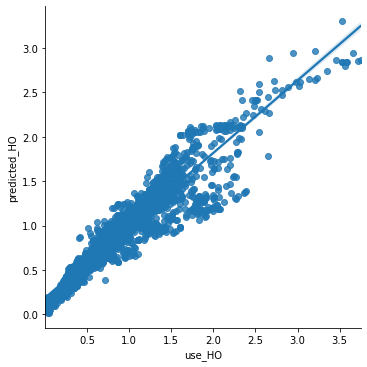

In [131]:
preds_svm = pd.DataFrame(y_test)
preds_svm['predicted_HO'] = preds_svr
sns.lmplot(x='use_HO', y='predicted_HO', data=preds_svm)

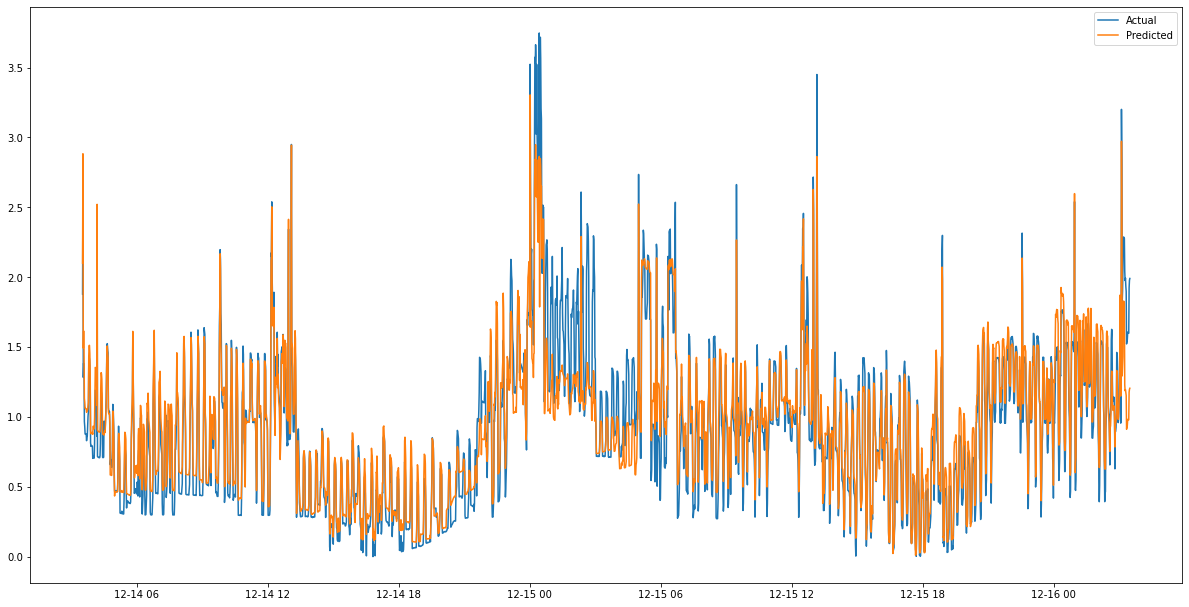

In [132]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_axes([0,0,1,1])

ax.plot(preds_svm['use_HO'], label="Actual")
ax.plot(preds_svm['predicted_HO'], label="Predicted")
ax.legend()

2 Days Forecast Evaluation

In [137]:
preds_svm

,use_HO,predicted_HO
time,,
2016-12-14,862.472633,928.251276
2016-12-15,1508.666433,1486.673860
2016-12-16,273.442767,278.553572


In [135]:
preds_svm = preds_svm.resample(rule='D').sum()
print('RMSE:',((preds_svm.use_HO - preds_svm.predicted_HO) ** 2).mean() ** .5)

RMSE: 40.15230782268054


In [136]:
y_test_daily = preds_svm['use_HO']
preds_svm_daily = preds_svm['predicted_HO']
print('MAE:', metrics.mean_absolute_error(y_test_daily, preds_svm_daily))

MAE: 30.96067375770379


# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train,y_train)

LinearRegression()

In [36]:
preds_lr = lm.predict(X_test)

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, preds_lr))
print('MSE:', metrics.mean_squared_error(y_test, preds_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_lr)))

MAE: 0.4225361673816309
MSE: 0.282697822583322
RMSE: 0.5316933539017786


In [38]:
preds_linear = pd.DataFrame(y_test)
preds_linear['predicted_HO'] = preds_lr

In [39]:
preds_linear

,use_HO,predicted_HO
time,,
2016-12-14 03:31:00,1.879617,2.200734
2016-12-14 03:32:00,2.660900,3.346537
2016-12-14 03:33:00,1.283050,1.916516
2016-12-14 03:34:00,1.384467,2.011481
2016-12-14 03:35:00,1.310733,1.844821
...,...,...
2016-12-16 03:25:00,1.601233,1.605490
2016-12-16 03:26:00,1.599333,1.607671
2016-12-16 03:27:00,1.924267,2.364093


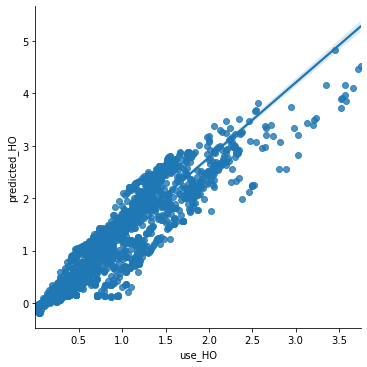

In [40]:
sns.lmplot(x='use_HO', y='predicted_HO', data=preds_linear)

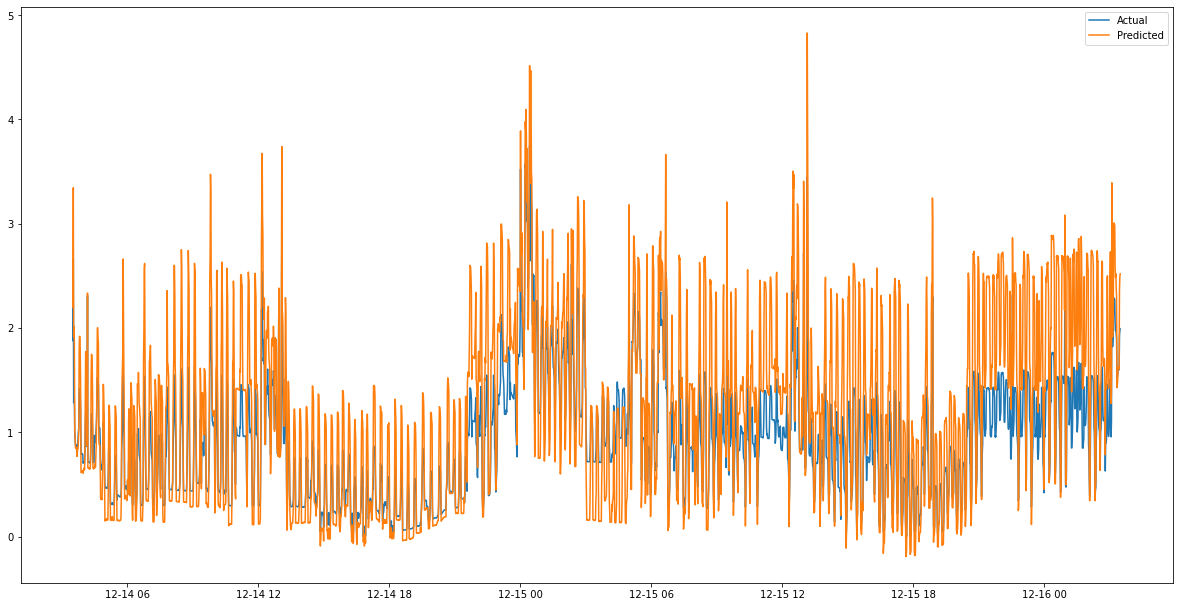

In [41]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_axes([0,0,1,1])

ax.plot(preds_linear['use_HO'], label="Actual")
ax.plot(preds_linear['predicted_HO'], label="Predicted")
ax.legend()

In [42]:
preds_linear = preds_linear.resample(rule='D').sum()
print('RMSE:',((preds_linear.use_HO - preds_linear.predicted_HO) ** 2).mean() ** .5)

RMSE: 335.7297753958181


In [43]:
y_test_daily = preds_linear['use_HO']
preds_lr_daily = preds_linear['predicted_HO']
print('MAE:', metrics.mean_absolute_error(y_test_daily, preds_lr_daily))

MAE: 301.37983617998844


# Random Forest

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rfr = RandomForestRegressor()

In [83]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
preds_rfr = rfr.predict(X_test)

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, preds_rfr))
print('MSE:', metrics.mean_squared_error(y_test, preds_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_rfr)))

MAE: 0.17172008926980548
MSE: 0.06855529130752291
RMSE: 0.261830653872924


In [86]:
preds_rf = pd.DataFrame(y_test)
preds_rf['predicted_HO'] = preds_rfr
preds_rf

,use_HO,predicted_HO
time,,
2016-12-14 03:31:00,1.879617,2.219839
2016-12-14 03:32:00,2.660900,2.454339
2016-12-14 03:33:00,1.283050,1.480761
2016-12-14 03:34:00,1.384467,1.437505
2016-12-14 03:35:00,1.310733,1.529875
...,...,...
2016-12-16 03:25:00,1.601233,1.209994
2016-12-16 03:26:00,1.599333,1.265054
2016-12-16 03:27:00,1.924267,1.464944


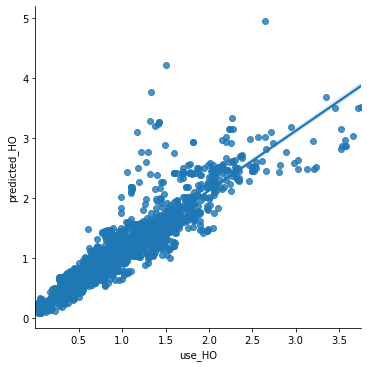

In [87]:
sns.lmplot(x='use_HO', y='predicted_HO', data=preds_rf)

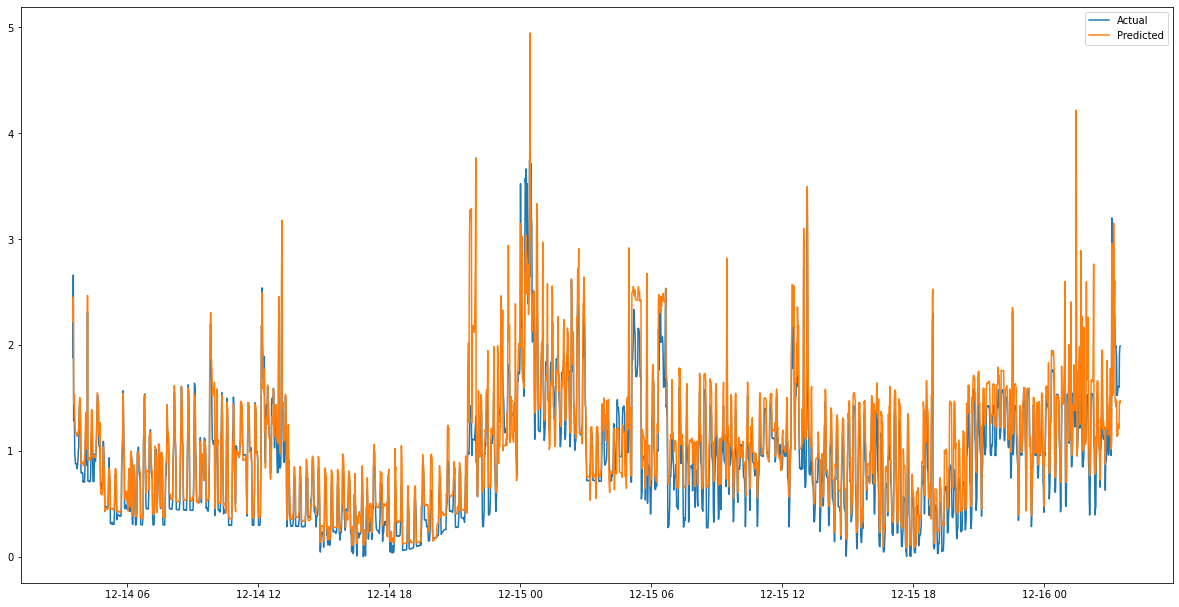

In [88]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_axes([0,0,1,1])

ax.plot(preds_rf['use_HO'], label="Actual")
ax.plot(preds_rf['predicted_HO'], label="Predicted")
ax.legend()

In [89]:
preds_rf = preds_rf.resample(rule='D').sum()
print('RMSE:',((preds_rf.use_HO - preds_rf.predicted_HO) ** 2).mean() ** .5)

RMSE: 150.65697218209826


In [90]:
y_test_daily = preds_rf['use_HO']
preds_rf_daily = preds_rf['predicted_HO']
print('MAE:', metrics.mean_absolute_error(y_test_daily, preds_rf_daily))

MAE: 126.6132670070909


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dtreg = DecisionTreeRegressor()

In [46]:
dtreg.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
preds_dt = dtreg.predict(X_test)

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, preds_dt))
print('MSE:', metrics.mean_squared_error(y_test, preds_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_dt)))

MAE: 0.25422521708822504
MSE: 0.1559351218639432
RMSE: 0.39488621381854194


In [49]:
preds_deciTree = pd.DataFrame(y_test)
preds_deciTree['predicted_HO'] = preds_dt
preds_deciTree

,use_HO,predicted_HO
time,,
2016-12-14 03:31:00,1.879617,3.560000
2016-12-14 03:32:00,2.660900,2.633950
2016-12-14 03:33:00,1.283050,1.005467
2016-12-14 03:34:00,1.384467,1.129433
2016-12-14 03:35:00,1.310733,1.129433
...,...,...
2016-12-16 03:25:00,1.601233,1.047850
2016-12-16 03:26:00,1.599333,1.047850
2016-12-16 03:27:00,1.924267,1.215533


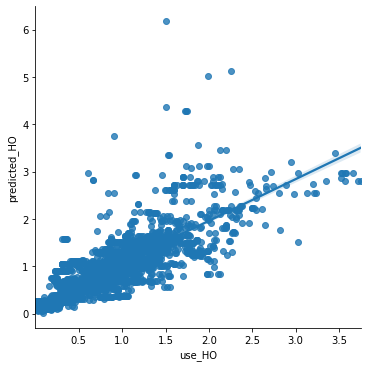

In [50]:
sns.lmplot(x='use_HO', y='predicted_HO', data=preds_deciTree)

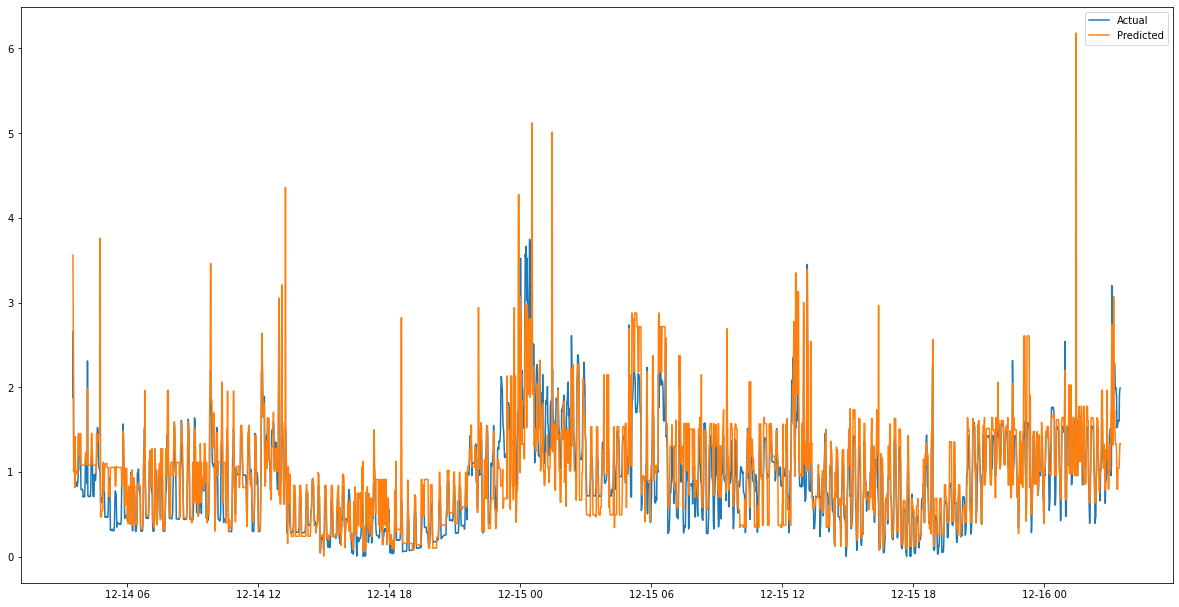

In [51]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_axes([0,0,1,1])

ax.plot(preds_deciTree['use_HO'], label="Actual")
ax.plot(preds_deciTree['predicted_HO'], label="Predicted")
ax.legend()

In [52]:
preds_deciTree = preds_deciTree.resample(rule='D').sum()
print('RMSE:',((preds_deciTree.use_HO - preds_deciTree.predicted_HO) ** 2).mean() ** .5)

RMSE: 104.47991538114044


In [53]:
y_test_daily = preds_deciTree['use_HO']
preds_dt_daily = preds_deciTree['predicted_HO']
print('MAE:', metrics.mean_absolute_error(y_test_daily, preds_dt_daily))

MAE: 85.49696667233326


# kNeighbors regressor

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
knn = KNeighborsRegressor()

In [56]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [57]:
preds_knn = knn.predict(X_test)

In [58]:
pred_knnReg = pd.DataFrame(y_test)
pred_knnReg['predicted_HO'] = preds_knn
pred_knnReg

,use_HO,predicted_HO
time,,
2016-12-14 03:31:00,1.879617,1.756240
2016-12-14 03:32:00,2.660900,2.711923
2016-12-14 03:33:00,1.283050,1.285907
2016-12-14 03:34:00,1.384467,1.725677
2016-12-14 03:35:00,1.310733,1.643403
...,...,...
2016-12-16 03:25:00,1.601233,0.941917
2016-12-16 03:26:00,1.599333,0.941917
2016-12-16 03:27:00,1.924267,1.406907


In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, preds_knn))
print('MSE:', metrics.mean_squared_error(y_test, preds_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_knn)))

MAE: 0.1452187692413338
MSE: 0.04439448983564311
RMSE: 0.21069999960997415


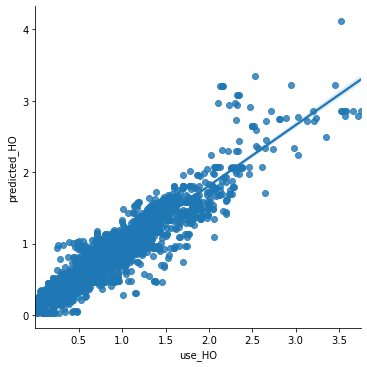

In [60]:
sns.lmplot(x='use_HO', y='predicted_HO', data=pred_knnReg)

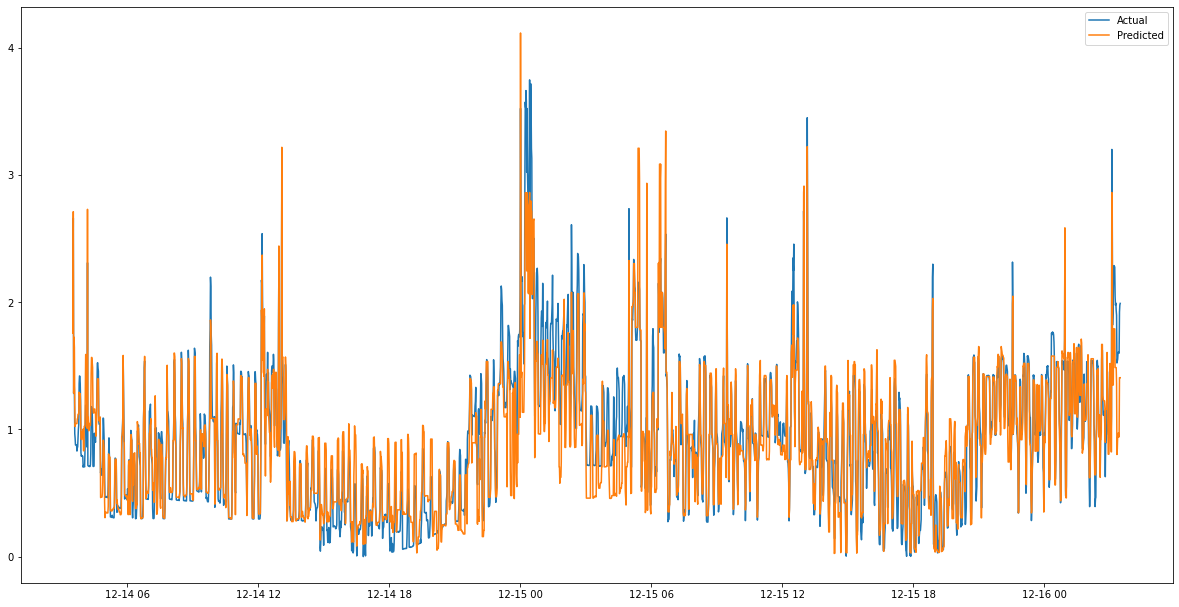

In [61]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_axes([0,0,1,1])

ax.plot(pred_knnReg['use_HO'], label="Actual")
ax.plot(pred_knnReg['predicted_HO'], label="Predicted")
ax.legend()

In [62]:
pred_knnReg = pred_knnReg.resample(rule='D').sum()
((pred_knnReg.use_HO - pred_knnReg.predicted_HO) ** 2).mean() ** .5

48.993798263231994

In [63]:
y_test_daily = pred_knnReg['use_HO']
preds_knn_daily = pred_knnReg['predicted_HO']
print('MAE:', metrics.mean_absolute_error(y_test_daily, preds_knn_daily))

MAE: 37.88799222193254


# Neural Networks

In [64]:
X_train_nn = pca_df.iloc[0:498153,0:22]
y_train_nn = pca_df.iloc[0:498153:,-1]
X_val_nn = pca_df.iloc[498153:501031,0:22]
y_val_nn = pca_df.iloc[498153:501031,-1]
X_test_nn = pca_df.iloc[501031:,0:22]
y_test_nn = pca_df.iloc[501031:,-1]

In [65]:
y_val_nn.shape

(2878,)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

In [69]:
model.compile(optimizer='adam', loss='mse')

In [70]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [71]:
model.fit(X_train, y_train, epochs = 200, validation_data=(X_val_nn, y_val_nn),
         callbacks=[early_stop])

Epoch 1/200
15658/15658 [==============================] - 10s 582us/step - loss: 0.2573 - val_loss: 0.1915
Epoch 2/200
15658/15658 [==============================] - 11s 678us/step - loss: 0.1727 - val_loss: 0.1866
Epoch 3/200
15658/15658 [==============================] - 10s 614us/step - loss: 0.1668 - val_loss: 0.1860
Epoch 4/200
15658/15658 [==============================] - 10s 669us/step - loss: 0.1638 - val_loss: 0.1887
Epoch 5/200
15658/15658 [==============================] - 9s 550us/step - loss: 0.1616 - val_loss: 0.1840
Epoch 6/200
15658/15658 [==============================] - 8s 541us/step - loss: 0.1597 - val_loss: 0.1917
Epoch 7/200
15658/15658 [==============================] - 9s 545us/step - loss: 0.1570 - val_loss: 0.1854
Epoch 8/200
15658/15658 [==============================] - 9s 548us/step - loss: 0.1543 - val_loss: 0.1831
Epoch 9/200
15658/15658 [==============================] - 9s 565us/step - loss: 0.1530 - val_loss: 0.1867
Epoch 10/200
15658/15658 [=======

In [72]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

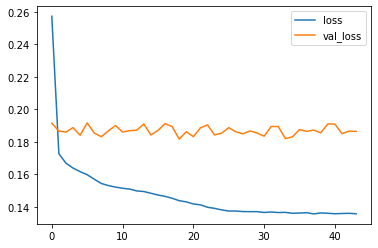

In [73]:
losses.plot()

In [74]:
preds_nn = model.predict(X_test)

In [75]:
pred_nn = pd.DataFrame(y_test)
pred_nn['predicted_HO'] = preds_nn
pred_nn

,use_HO,predicted_HO
time,,
2016-12-14 03:31:00,1.879617,2.048258
2016-12-14 03:32:00,2.660900,3.010186
2016-12-14 03:33:00,1.283050,1.497715
2016-12-14 03:34:00,1.384467,1.620742
2016-12-14 03:35:00,1.310733,1.544320
...,...,...
2016-12-16 03:25:00,1.601233,1.055246
2016-12-16 03:26:00,1.599333,1.056052
2016-12-16 03:27:00,1.924267,1.411654


In [76]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, preds_nn))
print('MSE:', metrics.mean_squared_error(y_test, preds_nn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds_nn)))

MAE: 0.11065039860750234
MSE: 0.020294018711379654
RMSE: 0.142457076733238


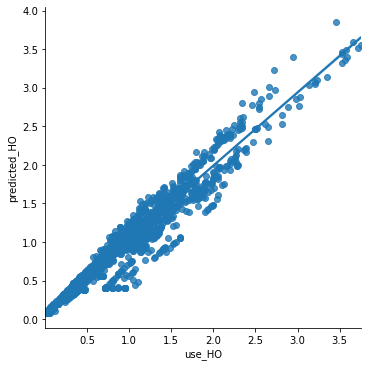

In [77]:
sns.lmplot(x='use_HO', y='predicted_HO', data=pred_nn)

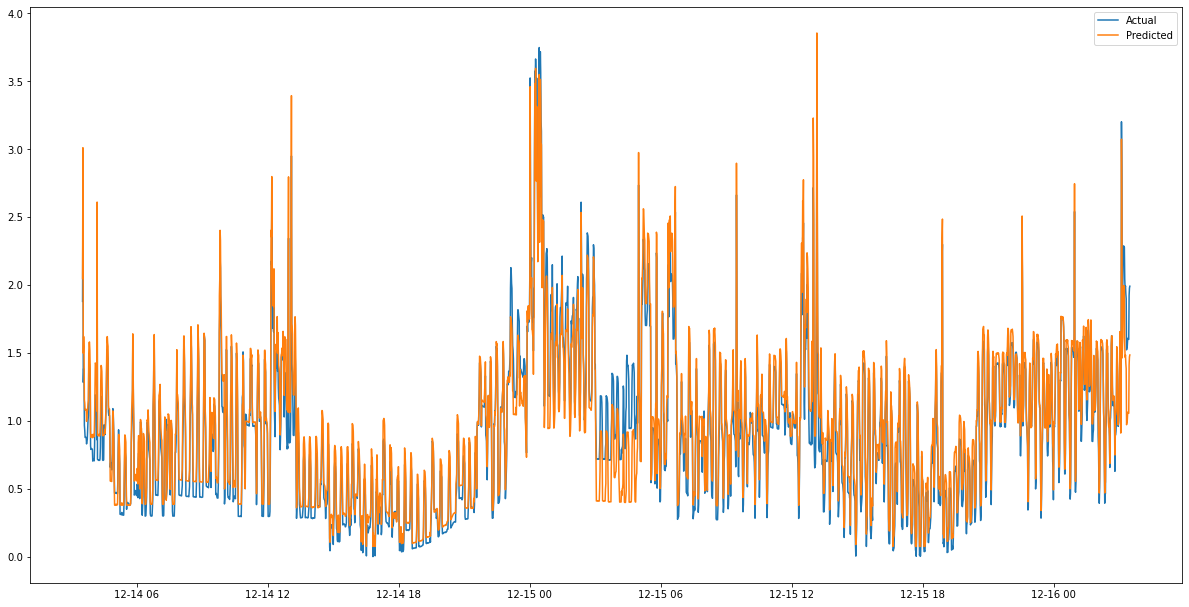

In [78]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_axes([0,0,1,1])

ax.plot(pred_nn['use_HO'], label="Actual")
ax.plot(pred_nn['predicted_HO'], label="Predicted")
ax.legend()

In [138]:
preds_nn = pred_nn.resample(rule='D').sum()
print('RMSE:',((preds_nn.use_HO - preds_nn.predicted_HO) ** 2).mean() ** .5)

RMSE: 58.96940134437933


In [139]:
y_test_daily = preds_nn['use_HO']
preds_nn_daily = preds_nn['predicted_HO']
print('MAE:', metrics.mean_absolute_error(y_test_daily, preds_nn_daily))

MAE: 45.541795267671944


# Average, Max, Min Energy usage in the smart home

In [218]:
energy_daily_df = energy_data.resample(rule='D').sum()

In [219]:
print('Mean',energy_daily_df['use_HO'].mean())
print('Maximum',energy_daily_df['use_HO'].max())
print('Minimum',energy_daily_df['use_HO'].min())

Mean 1233.1616537521634
Maximum 4985.831866670989
Minimum 273.442766661


# Feature Importance 

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
X_fs = df1.drop('use_HO', axis=1)
y_fs = df1.use_HO

In [ ]:
reg = LassoCV()
reg.fit(X_fs, y_fs)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_fs,y_fs))
coef = pd.Series(reg.coef_, index = X_fs.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Forecasting 7 Days

In [30]:
X_trainNew = pca_df.iloc[0:493831,0:22]
y_trainNew = pca_df.iloc[0:493831:,-1]
X_testNew = pca_df.iloc[493831:,0:22]
y_testNew = pca_df.iloc[493831:,-1]

# SVR

In [31]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()
svr.fit(X_trainNew,y_trainNew)

In [97]:
preds_svrNew = svr.predict(X_testNew)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_testNew, preds_svrNew))
print('MSE:', metrics.mean_squared_error(y_testNew, preds_svrNew))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_testNew, preds_svrNew)))

In [99]:
preds_svrNew = pd.DataFrame(y_test)
preds_svrNew['predicted_HO'] = preds_lr
preds_svrNew

In [ ]:
sns.lmplot(x='use_HO', y='predicted_HO', data=preds_svrNew)

In [ ]:
fig = plt.figure(figsize=(16,8))

ax = fig.add_axes([0,0,1,1])

ax.plot(preds_svrNew['use_HO'], label="Actual")
ax.plot(preds_svrNew['predicted_HO'], label="Predicted")
ax.legend()

In [103]:
preds_svrNew = preds_svrNew.resample(rule='D').sum()
print('RMSE:',((preds_svrNew.use_HO - preds_svrNew.predicted_HO) ** 2).mean() ** .5)
y_test_weekly = preds_svrNew['use_HO']
preds_svr_weekly = preds_svrNew['predicted_HO']
print('MAE:', metrics.mean_absolute_error(y_test_weekly, preds_svr_weekly))